<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Usecase: High Dimensional Visualization using PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from matplotlib.pyplot import cm
import seaborn as sns

#### **Loading dataset**

In sklearn we have a very interesting dataset called **'digits'**.
The dataset contains information about handwritten digits from $0$ to $9$

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

You can see below that dataset has some **data**, a **target variable**, and actual images in **images** which can be used for visualizing images

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**Q. So, how our dataset looks like?**

- We define **data** as our features and **target** as target variable

**NOTE:** Do not confuse below given $Y$ with $y_{i}$s that we used when understanding PCA


In [ ]:
X = digits.data
Y = digits.target

Our dataset contains $1797$ images with $64$ features

In [ ]:
X.shape

(1797, 64)

If you see the shape of an image, it is represented as $8$x$8$ matrix.

We use grayscale representation where an image pixel takes values in $[0,255]$; where $0$ indicates pure black and $255$ indicates pure white

In [ ]:
digits.images.shape

(1797, 8, 8)

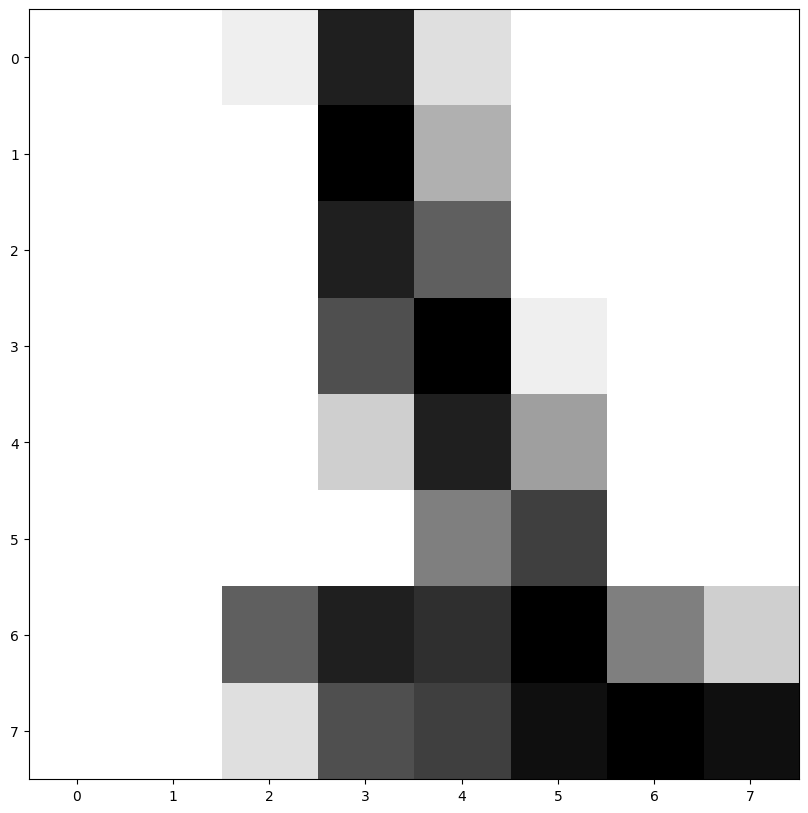

In [ ]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r) #------> seems like number 1

#### **Implementing PCA**

We can implement PCA using sklearn's **PCA** method present in **decomposition** module.

Here we'll use PCA for mapping 64-dimensional digits data into 2-dimensional data. We do this by using parameter **n_components** in **PCA** method

We then fit PCA model on to our data $X(1797$ x $64)$ and this will calculate the top two eigen vectors will get computed ($u_{1}$, $u_{2}$)

Then, we use transform the data which basically does matrix multiplication of $x_{i}$s with eigen vectors ($u_{1}$, $u_{2}$)

In [ ]:
from sklearn import decomposition

In [ ]:
#PCA
# %%time prints the time taken for execution for this cell
%%time
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

CPU times: user 22.9 ms, sys: 22.2 ms, total: 45.1 ms
Wall time: 35.1 ms


Let's now plot the results. For that we are going to use customized colormap using matlpotlib's **ListedColormap**

We'll use 10 different colors using target variable $Y$

#### **Plotting results**

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

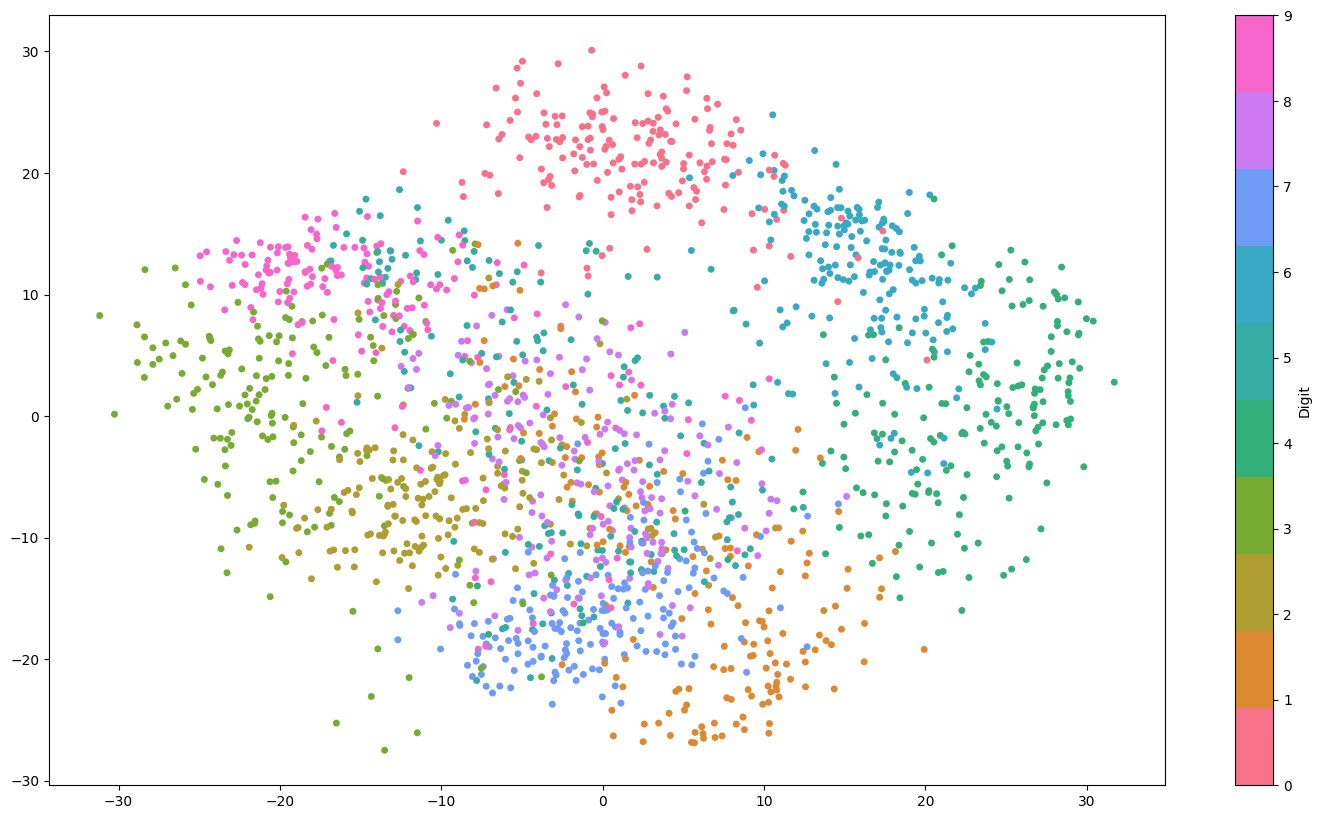

In [ ]:
fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **What can we interpret from this?**

- $7$ is represented by light bluish color, $8$ is represented by light purplish color and $9$ with slightly more dark pink color

- You can see all these points are getting overlapped in the central region.

- This tells the similarity between three digits, as people have different handwritings and sometimes different digits often appears the same

- Whereas digits like $3$ and $4$  are difficult to get mixed and hence they are grouped around the left and right side of the plots respectively.

#### Variance preserved by 2 components

In [ ]:
decomposition.PCA(n_components=2).fit(X).explained_variance_ratio_.sum()

0.2850936482369767

Notice that
- Only 28% of variance is preserved by 2 components.

## Tsne

### **Implementation of t-SNE**

For implementing t-SNE, we'll use **openTSNE**.

But, you can also use sklearns t-SNE. For more, you can refer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"> this link </a>

#### **Installing openTSNE**

In [ ]:
!pip install openTSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.1 MB/s eta 0:00:00


We'll use the same digits dataset that we used in the PCA.

We are setting **n_jobs** = -1, which means we are using all the CPU cores available on the machine

We're initlializing randomly, and using Barnes Hut method, and fitting on our data $X$

#### **Fitting t-SNE on data**

In [ ]:
from openTSNE import TSNE

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)

CPU times: user 2min 28s, sys: 2min 40s, total: 5min 8s
Wall time: 2min 59s


Looking at the CPU times, we can see how expensive t-SNE is in comparision with PCA.

Let's now visualize the t-SNE results

#### **Visualizing t-SNE results**

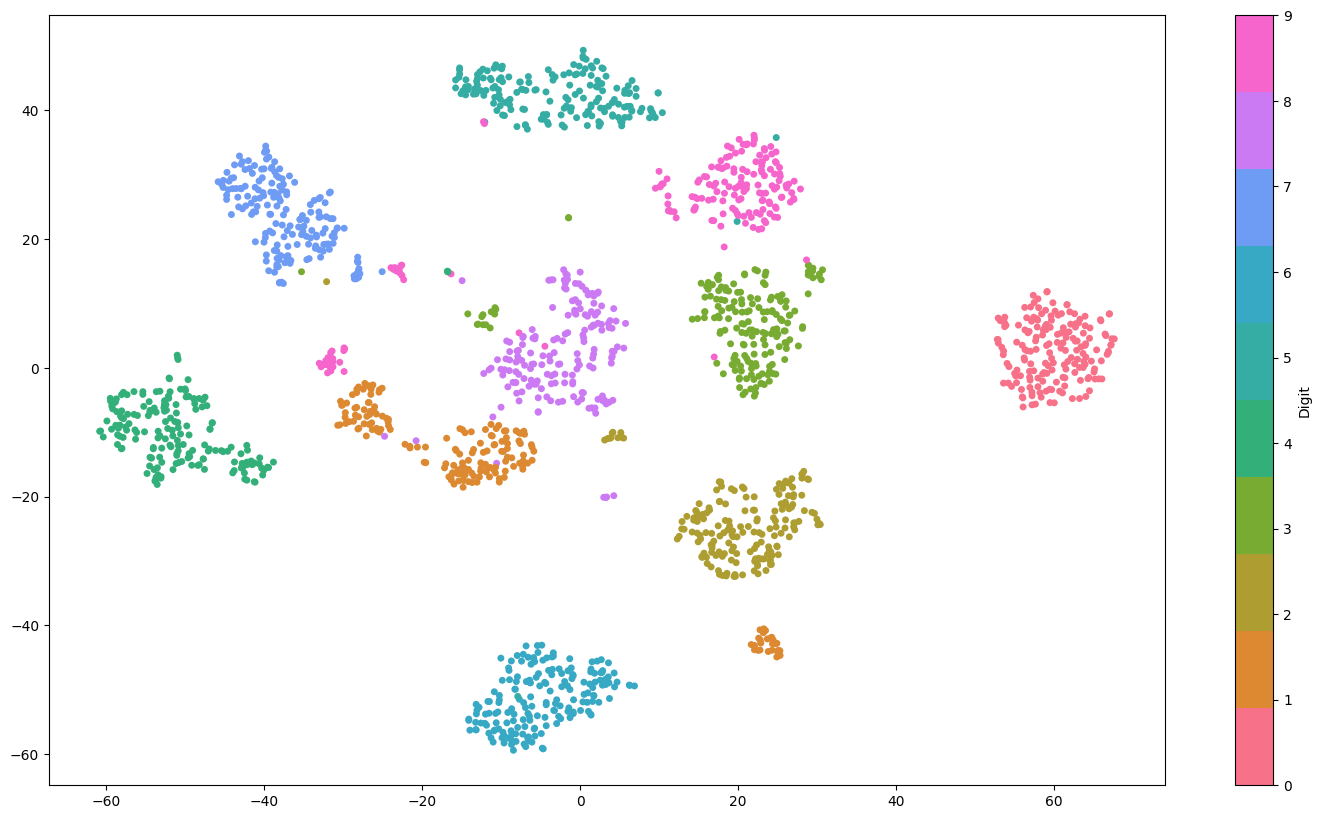

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **Interpreting the results**

Unlike PCA, here if there were no labels($Y$), we can easily differentiate the different clusters

You can see how well t-SNE preserves the neighborhood information, which was not done by the PCA

Other than this, we can still figure out a lot from the results that we got. Let's see a few points that we can learn from the plots.

1. If you see, the $1$s are represented by orange. There are 3 clusters of points beloning to class $1$ which are close to the clusters of class $2$, $8$, and $9$.
  - This represents that in real world, people with different handwritings might have similar apperances of 1 with the numbers $2$, $8$, and $9$

<img src='https://drive.google.com/uc?id=1N3C2tKyKGQxdqlWq9fJ4EAxUYS-WS6vL'>

2. Class $3$ is represented by green color. While most of the green points are clustered together, some of the green points are scattered towards cluster of $8$.

  - This also represents the variablity that human handwriting has in real world due to which both the numbers may be interpreted as the same


Based on this, even if the plot did not have colors, we can figure out the similar clusters and we can perform data analysis on that group of points

## UMAP

### **UMAP Implementation**

Here also, we'll be using the same digits dataset.
For implementing UMAP, we'll be using **umap-learn** library

#### **Installing libraries**

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6eae7d0ec99d04af0d82704f95c63526360ffeeea18ed23f8e23137c3dc1e689
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from umap import UMAP

#### **Fitting UMAP**

You will see that UMAP is comparitively faster than t-SNE and this tends to be true for larger datasets as well

In [ ]:
%%time
Z3 = UMAP(init='random', random_state=42).fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



CPU times: user 19.2 s, sys: 78.6 ms, total: 19.2 s
Wall time: 29 s


#### **Visualizing results**

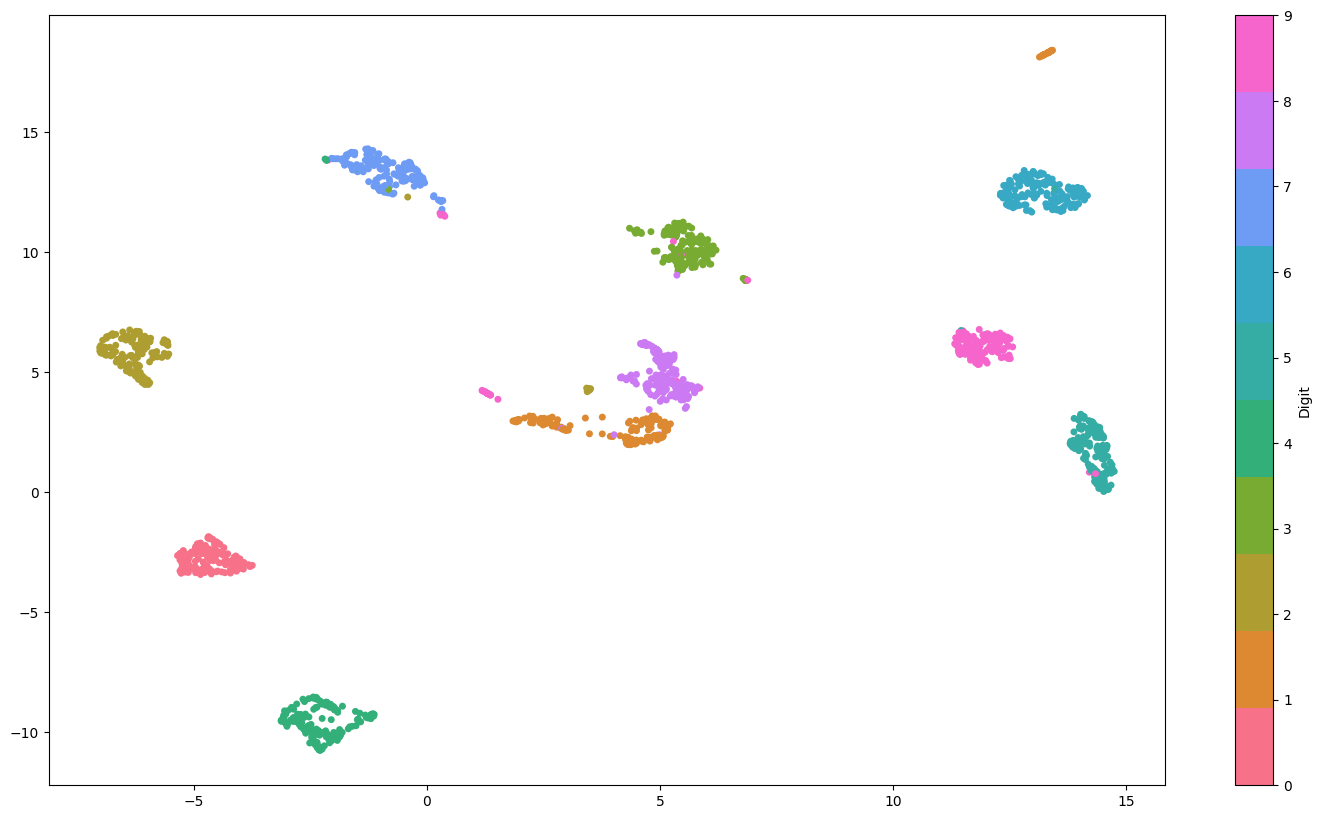

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z3[:,0], Z3[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')